In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [69]:
train = pd.read_csv("dataset/titanic/train.csv")
test = pd.read_csv("dataset/titanic/test.csv")
gender_submission =  pd.read_csv("dataset/titanic/gender_submission.csv")

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

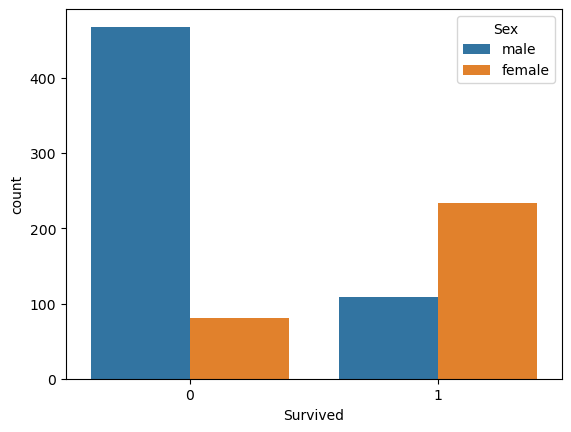

In [71]:
sns.countplot(x="Survived", hue="Sex", data=train)

<Axes: xlabel='Survived', ylabel='count'>

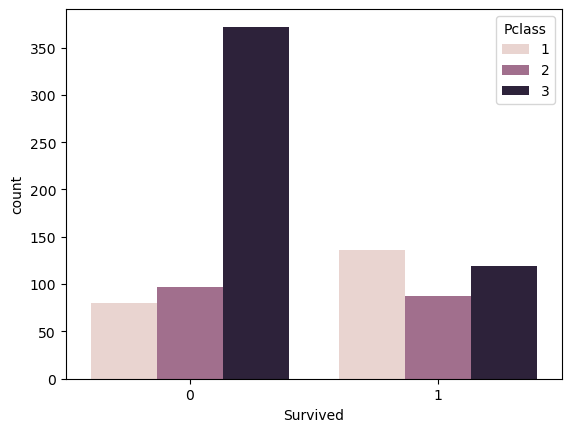

In [72]:
sns.countplot(x="Survived", hue="Pclass", data=train)

<Axes: ylabel='Frequency'>

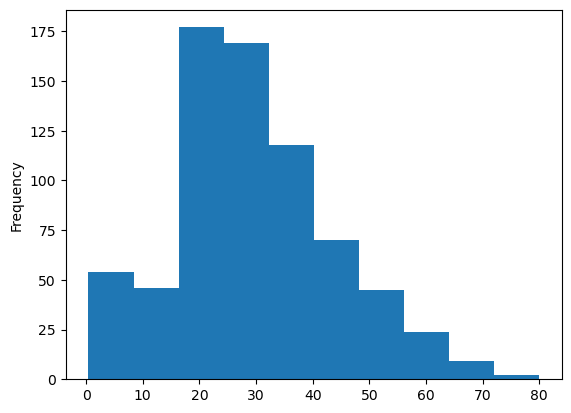

In [73]:
train["Age"].plot.hist()

<Axes: ylabel='Frequency'>

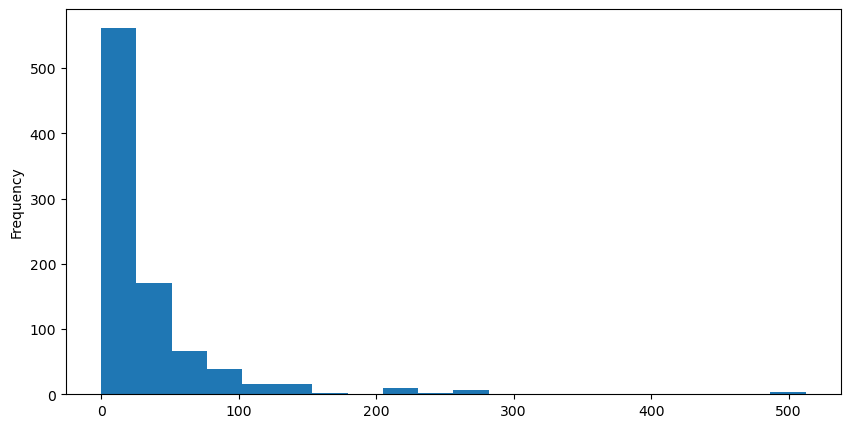

In [74]:
train["Fare"].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

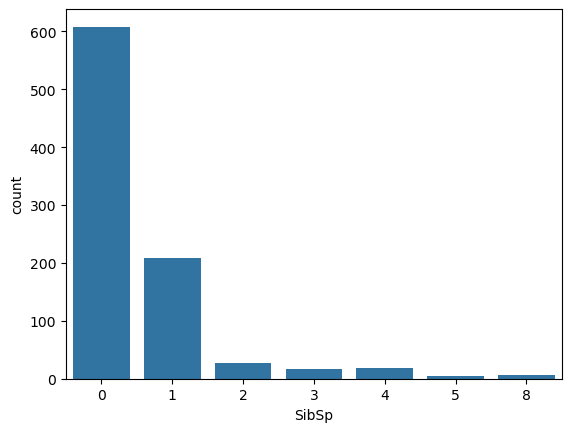

In [75]:
sns.countplot(x="SibSp", data=train)

In [76]:
train.isnull().sum()
# sns.heatmap(train.isnull(), yticklabels=False)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

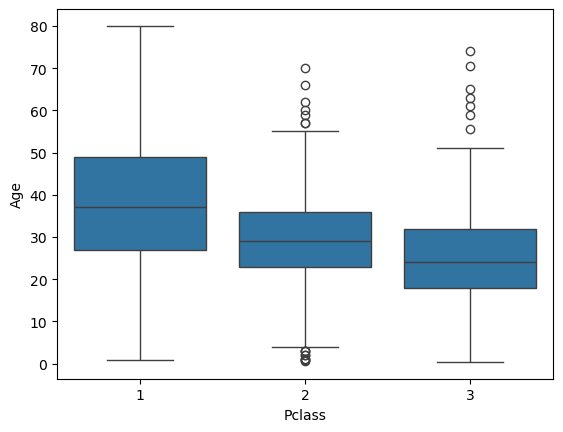

In [77]:
sns.boxplot(x="Pclass", y="Age", data=train)

In [78]:
train.drop("Cabin", axis=1, inplace=True)
train.dropna(inplace=True)

<Axes: >

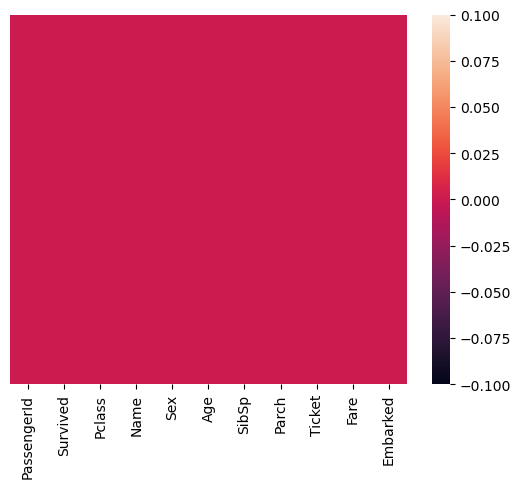

In [79]:
sns.heatmap(train.isnull(), yticklabels=False)

In [80]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
sex.head(5)

,male
0,True
1,False
2,False
3,False
4,True


In [81]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [82]:
pcl = pd.get_dummies(train["Pclass"], drop_first=True)
pcl.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [83]:
train = pd.concat([train, sex, embark, pcl], axis=1)
train.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket", "Pclass"], axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [98]:
train.rename(columns={2: "2", 3: "3"}, inplace=True)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Age       712 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   male      712 non-null    bool   
 6   Q         712 non-null    bool   
 7   S         712 non-null    bool   
 8   2         712 non-null    bool   
 9   3         712 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 36.9 KB


### Train Data

In [103]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
log = LogisticRegression(solver='lbfgs', max_iter=1000)
log.fit(X_train, y_train)
predictions = log.predict(X_test)

### Accuracy Check

In [111]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.89      0.84       122\n           1       0.82      0.70      0.75        92\n\n    accuracy                           0.80       214\n   macro avg       0.81      0.79      0.80       214\nweighted avg       0.81      0.80      0.80       214\n'

In [113]:
confusion_matrix(y_test, predictions)
# TN FP
# FN TP

array([[108,  14],
       [ 28,  64]], dtype=int64)

In [116]:
accuracy_score(y_test, predictions)*100

80.37383177570094